In [1]:
# Import libraries
import numpy as np
import pandas as pd
import os,time
import pickle,gzip

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
color=sns.color_palette()
%matplotlib inline

In [3]:
from sklearn import preprocessing as pp
from  sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve,average_precision_score
from sklearn.metrics import roc_curve,auc,roc_auc_score

In [7]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import fastcluster
from scipy.cluster.hierarchy import dendrogram, cophenet,fcluster
from scipy.spatial.distance import pdist

In [9]:
current_path=os.getcwd()
file='\mnist.pkl.gz'

f=gzip.open(current_path+file,'rb')
train_set,validation_set,test_set=pickle.load(f,encoding='latin1')
f.close()

X_train,y_train=train_set[0],train_set[1]
X_validation,y_validation=validation_set[0],validation_set[1]
X_test,y_test=test_set[0],test_set[1]

In [10]:
train_index=range(0,len(X_train))
validation_index=range(len(X_train),len(X_train)+len(X_validation))
test_index=range(len(X_train)+len(X_validation),len(X_train)+len(X_validation)+len(X_test))

X_train=pd.DataFrame(data=X_train,index=train_index)
y_train=pd.Series(data=y_train,index=train_index)

X_validation=pd.DataFrame(data=X_validation,index=validation_index)
y_validation=pd.Series(data=y_validation,index=validation_index)

X_test=pd.DataFrame(data=X_test,index=test_index)
y_test=pd.Series(data=y_test,index=test_index)

In [11]:
# PCA
from sklearn.decomposition import PCA

n_components=784
whiten=False
random_state=2018

pca=PCA(n_components=n_components,whiten=whiten,random_state=random_state)
X_train_PCA=pca.fit_transform(X_train)
X_train_PCA=pd.DataFrame(data=X_train_PCA, index=train_index)

In [13]:
# Log Data
cwd=os.getcwd()
# Specify the directory
log_dir = cwd + "/logs/05_clustering/"

# Create the directory if it doesn't exist
if not os.path.exists(log_dir):
    os.makedirs(log_dir)

# Save the file
y_train[0:2000].to_csv(log_dir + 'labels.tsv', sep='\t', index=False, header=False)

In [16]:
# K-means - Inertia as the number of clusters varies
from sklearn.cluster import KMeans

n_clusters=10
n_init=10 # max number of initializations we would like to perform
max_iter=300
tol=0.0001
random_state=2010

KMeans_inertia=pd.DataFrame(data=[],index=range(2,21),columns=['inertia']) # We will check cluster sizes from 2 to 20 and record the inertia for each

for n_clusters in range(2,21):
    kmeans =KMeans(n_clusters=n_clusters,n_init=n_init,max_iter=max_iter,tol=tol,random_state=random_state)
    
    cutoff=99
    kmeans.fit(X_train_PCA.loc[:,0:cutoff])
    KMeans_inertia.loc[n_clusters]=kmeans.inertia_

<Axes: >

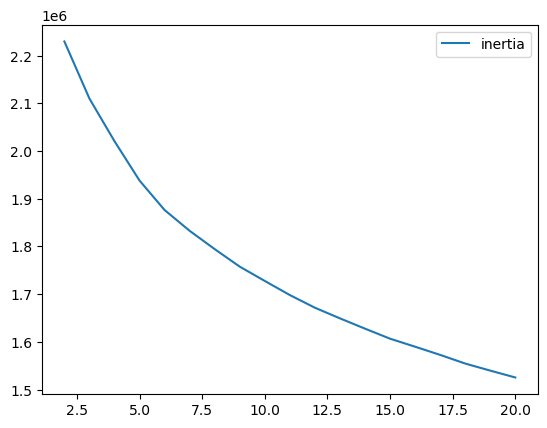

In [18]:
# Plot inertia relative to k # of clusters
KMeans_inertia.plot()

In [19]:
# Define analyze cluster function
def analyzeCluster(clusterDF,labelsDF):
    CountByCluster=pd.DataFrame(data=clusterDF['cluster'].value_counts())
    countByCluster.reset_index(inplace=True,drop=False)
    countByCluster.columns=['cluster','clusterCount']
    
    preds=pd.concat(['labelsDF','clsuterDF'],axis=1)
    preds.columns=['trueLabel','cluster']
    
    countByLabel=pd.DataFrame(data=preds.groupby('trueLabel').count())
    
    countMostFreq=pd.DataFrame(data=preds.groupby('cluster').agg(lambda x:x.value_counts().iloc[0]))
    countMostFreq.reset_index(inplace=True,drop=False)
    countMostFreq.columns=['cluster','countMostFrequent']
    
    AccuracyDF=countMostFreq.merge(CountByCluster,left_on='cluster',right_on='cluster')
    overallAccuracy=accuracyDF.countMostFrequent.sum()/accuracyDF.clusterCount.sum()
    accuracyByLabel=accuracyDF.countMostFrequent/accuracyDf.clusterCount
    
    return countByCluster,countByLabel,countMostFreq, accuracyDF,overallAccuracy,accuracyByLabel

In [ ]:
# K-means - Accuracy as the number of clusters varies

n_clusters=5
n_init=10
max_iter=300
tol-0.0001
random_state=2010

KMeans_inertia=pd.DataFrame(data=[],index=range(2,21),columns=['inertia']) # We will check cluster sizes from 2 to 20 and record the inertia for each
overallAccuracy_KMeansDF=pd.DataFrame(data=[],index=range(2,21),columns=['overallAccuracy'])

for n_clusters in range(2,21):
    kmeans =KMeans(n_clusters=n_clusters,n_init=n_init,max_iter=max_iter,tol=tol,random_state=random_state)
    
    cutoff=99
    kmeans.fit(X_train_PCA.loc[:,0:cutoff])
    KMeans_inertia.loc[n_clusters]=kmeans.inertia_
    X_train_kmeansClustered=kmeans.predict(X_train_PCA.loc[:,0:cutoff])
    X_train_kmeansClustered=pd.DataFrame(data=X_train_kmeansClustered,index=X_train.index,)